In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
import feedparser

In [17]:
from IPython.core.display import display, HTML
#display(HTML('<h1>Hello, world!</h1>'))

In [5]:
#d = feedparser.parse('http://dbweb5.fnal.gov:8080/ECL/gm2/RSS/rss?form=End%20of%20Shift%20Checklist')
d = feedparser.parse('./endofshift.xml')

In [110]:
def parseEndOfShift( value , date ):
    #display(HTML(value))
    dfii = pandas.read_html(value)
    #df = pandas.DataFrame(df)
    df = pandas.DataFrame(dfii[0])
    #print(date)
    df[2] = str(date)
    return df

In [117]:
df = pandas.DataFrame()
for i, post in enumerate(d.entries):
    #if( i> 3 ):
    #    break
    #print(post.title)
    #print([x for x in post])
    dfi = parseEndOfShift( post.summary_detail.value, post.published )
    
    #print(type(dfi),"\n",dfi)
    df = df.append(dfi, ignore_index=True)
#print(df)

In [118]:
df.describe()

,0,1,2
count,1130,1002,1130
unique,5,475,226
top,All Clusters:,0,"Sun, 15 Dec 2019 23:56:11"
freq,226,96,5


In [119]:
df.head()

,0,1,2
0,T0 Integral:,3.17E5,"Sat, 08 Feb 2020 07:56:04"
1,All Clusters:,2075.4,"Sat, 08 Feb 2020 07:56:04"
2,POT Delivered:,1.02E12,"Sat, 08 Feb 2020 07:56:04"
3,Average Uptime [%]:,100%,"Sat, 08 Feb 2020 07:56:04"
4,Field screenshot:,NaN,"Sat, 08 Feb 2020 07:56:04"


In [121]:
dfi = df.loc[df[0] == "Average Uptime [%]:"]
dfi[3] = pandas.to_numeric( dfi[1].str.strip("%"), errors='coerce' )
dfi[4] = pandas.to_datetime( dfi[2] )

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [122]:
dfi.head()

,0,1,2,3,4
3,Average Uptime [%]:,100%,"Sat, 08 Feb 2020 07:56:04",100.0,2020-02-08 07:56:04
8,Average Uptime [%]:,98%,"Fri, 07 Feb 2020 23:47:44",98.0,2020-02-07 23:47:44
13,Average Uptime [%]:,97,"Fri, 07 Feb 2020 15:41:23",NaN,2020-02-07 15:41:23
18,Average Uptime [%]:,98,"Fri, 07 Feb 2020 07:48:25",98.0,2020-02-07 07:48:25
23,Average Uptime [%]:,95%,"Thu, 06 Feb 2020 23:49:32",95.0,2020-02-06 23:49:32


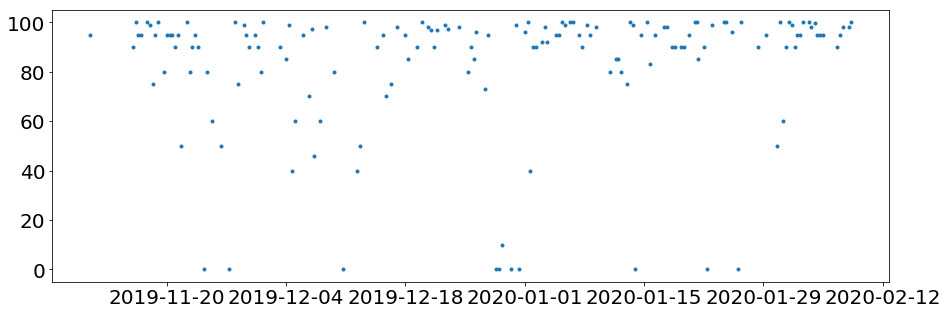

In [124]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(dfi[4], dfi[3], ".")
plt.show()